# Solve a RBC model

Last update: Oct 22nd, 2020

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Parameterization
alpha = 1.0 / 3
beta = 0.99
gamma = 1.0
delta = 0.025

# A very simple z process
n_z = 2
z_grid = np.array([-0.01, 0.01])
P = np.array([[0.8, 0.2], [0.2, 0.8]])

In [35]:
# Utility function
def u(c, gamma):
    if (c < 0):
        return -1e10
    elif (gamma == 1.0):
        return np.log(c)
    else:
        return (c ** (1 - gamma)) / (1 - gamma)

In [36]:
# Production function
def f(z, k, alpha):
    return np.exp(z) * (k ** alpha)

Up to now are some parameterizations and function definitions.

In [42]:
# Make a grid
n_k = 100
k_grid = np.linspace(1.0, 40, n_k)

In [43]:
T = 100
V = np.zeros((T, n_z, n_k))

for i in range(T - 1):
    for j in range(n_z):
        for k in range(n_k):
            V[i + 1, j, k] = -1e10
            for kp in range(n_k):
                c = f(z_grid[j], k_grid[k], alpha) + (1 - delta) * k_grid[k] - k_grid[kp]
                tmp = u(c, gamma) + beta * np.dot(P[j, :], V[i, :, kp])
                if (tmp > V[i + 1, j, k]):
                    V[i + 1, j, k] = tmp
                    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


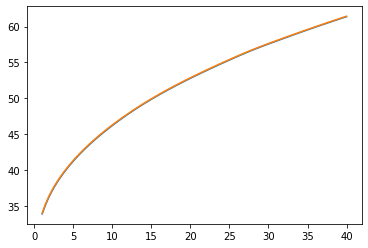

In [45]:
plt.plot(k_grid, V[T - 1, :, :].T)